<a href="https://colab.research.google.com/github/ntando-memela/Function-Approximation-Demo/blob/main/NN2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import deepxde as dde
import pandas as pd
import numpy as np

train = np.loadtxt("train_clean2.csv", delimiter=",")
test  = np.loadtxt("test_clean.csv", delimiter=",")

X_train = train[:, 0:1]
y_train = train[:, 1:2]

X_test  = test[:, 0:1]
y_test  = test[:, 1:2]

Compiling model...
'compile' took 0.005493 s

Training model...

Step      Train loss    Test loss     Test metric   
0         [3.56e-01]    [6.37e-01]    [5.88e+00]    
1000      [1.03e-01]    [2.00e-02]    [1.04e+00]    
2000      [4.25e-02]    [1.18e-02]    [7.99e-01]    
3000      [1.58e-02]    [7.64e-03]    [6.44e-01]    
4000      [1.36e-02]    [4.96e-03]    [5.18e-01]    
5000      [1.09e-02]    [4.86e-03]    [5.13e-01]    
6000      [6.92e-03]    [3.03e-03]    [4.05e-01]    
7000      [3.48e-03]    [4.41e-03]    [4.89e-01]    
8000      [2.75e-03]    [3.13e-03]    [4.12e-01]    
9000      [2.15e-03]    [4.75e-03]    [5.08e-01]    
10000     [1.52e-03]    [1.01e-02]    [7.40e-01]    
11000     [9.57e-04]    [8.22e-03]    [6.68e-01]    
12000     [4.02e-04]    [6.07e-03]    [5.74e-01]    
13000     [4.83e-05]    [6.89e-03]    [6.11e-01]    
14000     [7.78e-04]    [8.06e-03]    [6.61e-01]    
15000     [1.61e-06]    [7.05e-03]    [6.18e-01]    
16000     [1.36e-06]    [6.81e-03]

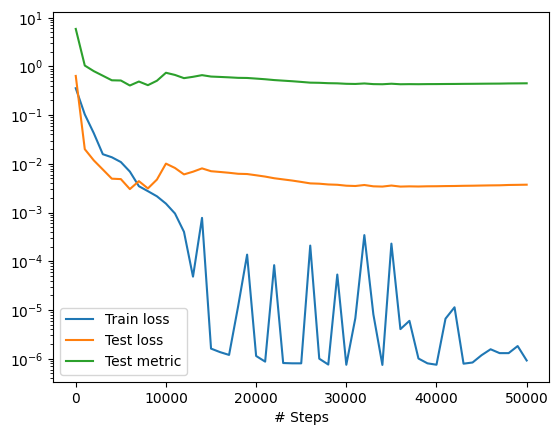

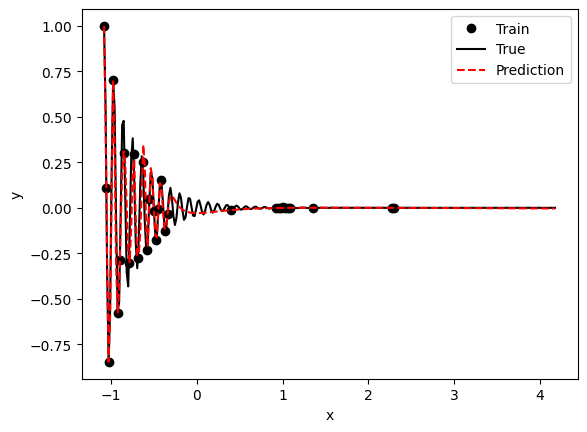

In [15]:
data = dde.data.DataSet(
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    standardize=True,
)

layer_size = [1] + [50] * 3 + [1]
activation = "tanh"
initializer = "Glorot normal"
net = dde.nn.FNN(layer_size, activation, initializer)

model = dde.Model(data, net)
model.compile("adam", lr=0.001, metrics=["l2 relative error"])
losshistory, train_state = model.train(iterations=50000)

dde.saveplot(losshistory, train_state, issave=True, isplot=True)